# DIABETES_DATA_VISUALIZE

This notebook mainly talks about the regression and its advantages

# 1 - IMPORTS FOR NOTEBOOK

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2 - LOAD DIABETES DATA

In [9]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

# 3 - CONVERT TO PANDAS DATAFRAME

### 3.2 - DATA OVERVIEW
<p>Attribute Information:</p>
<ol>
    <li><b>Age</b> </li>     
    <li><b>Sex</b> </li>     
    <li><b>Body mass index</b> </li>
    <li><b>Average blood pressure</b>  </li>
    <li><b>S1</b>       </li>
    <li><b>S2</b>       </li>
    <li><b>S3</b>       </li>
    <li><b>S4</b>       </li>
    <li><b>S5</b>       </li>
    <li><b>S6 is the Glucose level</b>       </li>
</ol>

In [17]:
diabetes_data = pd.read_csv('diabetes_data.txt',names=['AGE','SEX','BMI','AVG-BP','S1','S2','S3','S4','S5','S6-GLUCOSE','Y'],skiprows=1, sep='\t')

In [18]:
diabetes_data

,AGE,SEX,BMI,AVG-BP,S1,S2,S3,S4,S5,S6-GLUCOSE,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [19]:
glucose_levels = diabetes_data.iloc[:,9:10]

In [20]:
glucose_levels

,S6-GLUCOSE
0,87
1,69
2,85
3,89
4,80
...,...
437,93
438,102
439,95
440,85


In [21]:
input_features = diabetes_data.iloc[:,0:9]

In [22]:
input_features

,AGE,SEX,BMI,AVG-BP,S1,S2,S3,S4,S5
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905
...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299


# TEST AND TRAIN DATA

In [25]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(input_features, glucose_levels, test_size=0.33, random_state=42)

# REGRESSION 

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x, train_y)

In [27]:
reg.score(train_x, train_y)

0.32314418449256066

In [28]:
y_pred = reg.predict(test_x)

In [29]:
test_y

,S6-GLUCOSE
287,90
211,86
72,87
321,106
73,89
...,...
346,95
168,122
393,86
141,123


In [30]:
test_y.reset_index(inplace = True)
test_y

,index,S6-GLUCOSE
0,287,90
1,211,86
2,72,87
3,321,106
4,73,89
...,...,...
141,346,95
142,168,122
143,393,86
144,141,123


In [31]:
del test_y['index']
test_y

,S6-GLUCOSE
0,90
1,86
2,87
3,106
4,89
...,...
141,95
142,122
143,86
144,123


In [32]:
pd_results = pd.DataFrame(y_pred,columns=['y_pred'])

In [33]:
pd_results['y_test'] = test_y

In [34]:
pd_results

,y_pred,y_test
0,95.497093,90
1,93.549736,86
2,97.078873,87
3,107.318321,106
4,92.893979,89
...,...,...
141,100.788477,95
142,100.892347,122
143,82.504103,86
144,96.426069,123


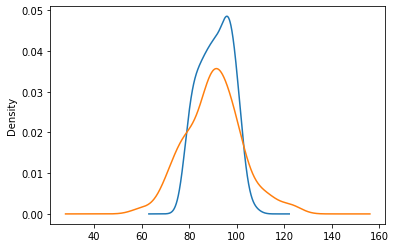

In [35]:
pd_results['y_pred'].plot.kde()
pd_results['y_test'].plot.kde()

# REGRESSION AFTER STANDARDIZATION

In [36]:
input_features

,AGE,SEX,BMI,AVG-BP,S1,S2,S3,S4,S5
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905
...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299


In [38]:
from sklearn.preprocessing import StandardScaler
input_features[['AGE']] = StandardScaler().fit_transform(input_features[['AGE']])

In [39]:
input_features

,AGE,SEX,BMI,AVG-BP,S1,S2,S3,S4,S5
0,0.800500,2,32.1,101.00,157,93.2,38.0,4.00,4.8598
1,-0.039567,1,21.6,87.00,183,103.2,70.0,3.00,3.8918
2,1.793307,2,30.5,93.00,156,93.6,41.0,4.00,4.6728
3,-1.872441,1,25.3,84.00,198,131.4,40.0,5.00,4.8903
4,0.113172,1,23.0,101.00,192,125.4,52.0,4.00,4.2905
...,...,...,...,...,...,...,...,...,...
437,0.876870,2,28.2,112.00,185,113.8,42.0,4.00,4.9836
438,-0.115937,2,24.9,75.00,225,166.0,42.0,5.00,4.4427
439,0.876870,2,24.9,99.67,162,106.6,43.0,3.77,4.1271
440,-0.956004,1,30.0,95.00,201,125.2,42.0,4.79,5.1299


In [40]:
input_features[['SEX']] = StandardScaler().fit_transform(input_features[['SEX']])
input_features[['BMI']] = StandardScaler().fit_transform(input_features[['BMI']])
input_features[['AVG-BP']] = StandardScaler().fit_transform(input_features[['AVG-BP']])
input_features[['S1']] = StandardScaler().fit_transform(input_features[['S1']])
input_features[['S2']] = StandardScaler().fit_transform(input_features[['S2']])
input_features[['S3']] = StandardScaler().fit_transform(input_features[['S3']])
input_features[['S4']] = StandardScaler().fit_transform(input_features[['S4']])
input_features[['S5']] = StandardScaler().fit_transform(input_features[['S5']])

In [41]:
input_features

,AGE,SEX,BMI,AVG-BP,S1,S2,S3,S4,S5
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502
...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163


In [42]:
from sklearn.model_selection import train_test_split
t_x, tst_x, t_y, tst_y = train_test_split(input_features, glucose_levels, test_size=0.33, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t_x, t_y)

In [44]:
reg.score(t_x, t_y)

0.32314418449256066

In [45]:
y_pred = reg.predict(t_x)

In [46]:
t_y.reset_index(inplace = True)
del t_y['index']
t_y

,S6-GLUCOSE
0,94
1,103
2,96
3,117
4,97
...,...
291,71
292,95
293,91
294,82


In [47]:
pd_results = pd.DataFrame(y_pred,columns=['y_pred'])

In [48]:
pd_results['y_test'] = t_y

In [49]:
pd_results

,y_pred,y_test
0,91.991148,94
1,96.868311,103
2,94.329115,96
3,93.497197,117
4,96.476383,97
...,...,...
291,79.734479,71
292,95.811073,95
293,88.533070,91
294,86.473263,82


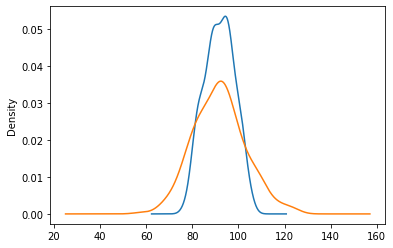

In [50]:
pd_results['y_pred'].plot.kde()
pd_results['y_test'].plot.kde()

# HEAT MAP ANALYSIS

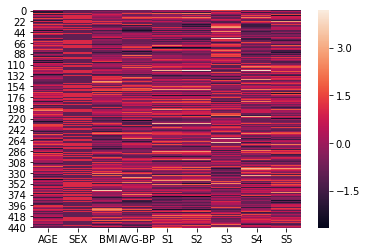

In [53]:
import seaborn as sns
sns.heatmap(input_features)

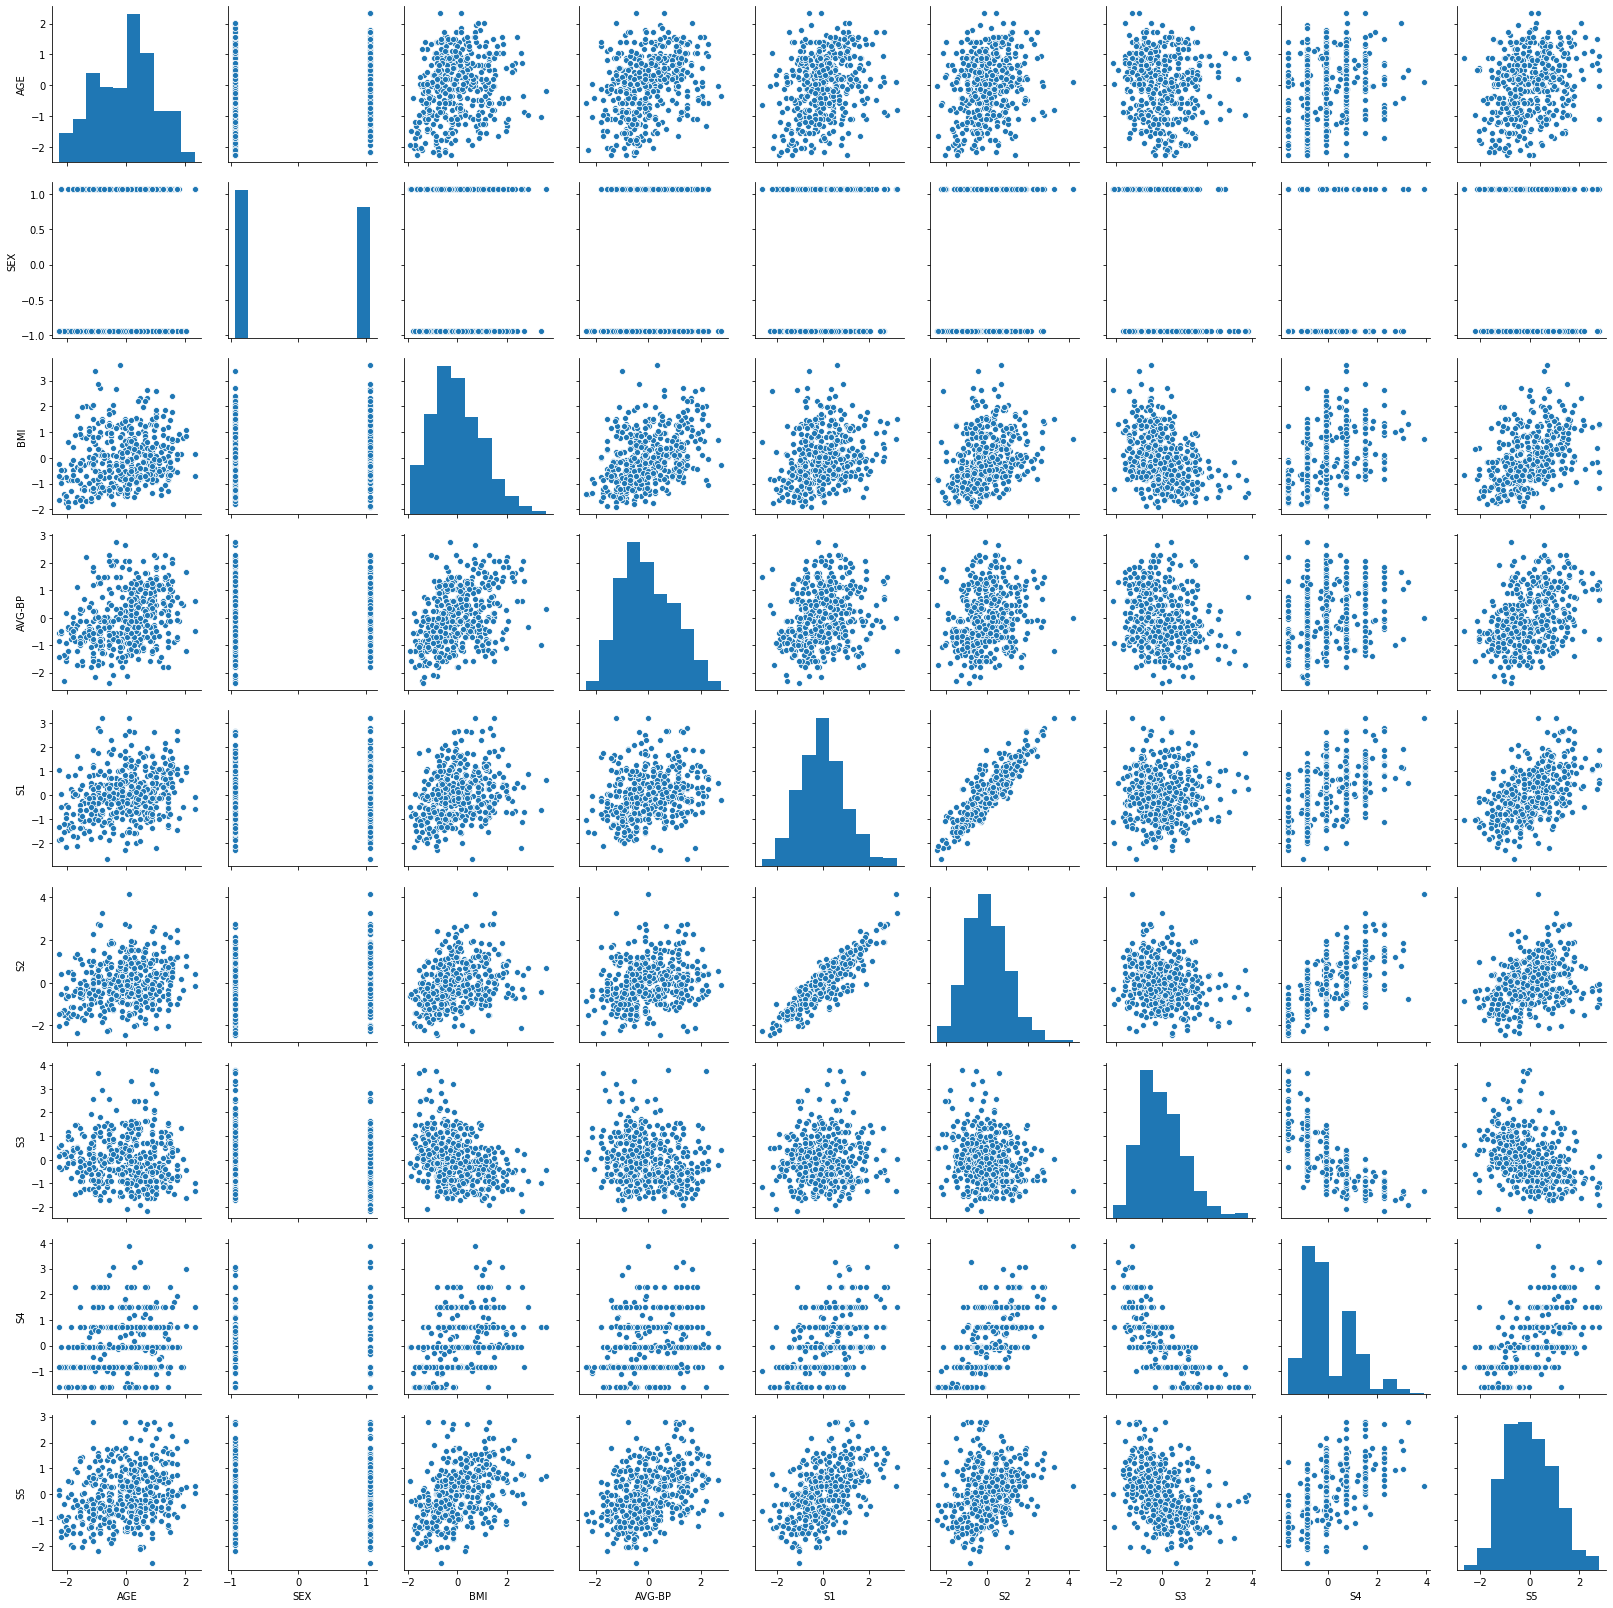

In [54]:
sns.pairplot(input_features)

# PCA 

In [56]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=8)

In [64]:
new_data = pca.fit(input_features)

In [65]:
new_data

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [63]:
print(pca.explained_variance_ratio_)

[0.40838911 0.16511182 0.12795897 0.10571473 0.07356645 0.06083322
 0.04875657 0.00871745]


In [62]:
print(pca.components_)

[[ 0.2193576   0.19634179  0.31211398  0.27370883  0.36967511  0.384051
  -0.30157414  0.45944723  0.39345509]
 [ 0.05892851 -0.40165714 -0.15692235 -0.12312274  0.55808906  0.42859644
   0.53721051 -0.10273611 -0.03327139]
 [ 0.56531043 -0.02739641  0.20083778  0.58440421 -0.06879522 -0.25500826
   0.32612577 -0.33708777  0.08978469]
 [-0.36189711 -0.67857367  0.53433502  0.04078288 -0.0702856  -0.18017365
  -0.06870105 -0.00353877  0.28152467]
 [-0.67870767  0.37153161  0.1413119   0.49862894  0.12947914  0.11877385
   0.24187257 -0.14246622 -0.1518198 ]
 [-0.19270167 -0.02761246 -0.61520923  0.17270785  0.07376604 -0.27615125
   0.05410676  0.04028028  0.6837706 ]
 [-0.00590108  0.4473089   0.38985333 -0.53633003  0.11862958 -0.1861303
   0.33916461 -0.19274769  0.39917745]
 [ 0.00621441 -0.00323789  0.03998217  0.02482166 -0.04346208 -0.35917348
   0.48186293  0.77298928 -0.19271056]]
